In [10]:
text = "Truly Kryptic is the best puzzle game. It's browser-based and free. Google it."

In [11]:
from nltk import word_tokenize
text_tokenized=word_tokenize(text.lower())
text_tokenized

['truly',
 'kryptic',
 'is',
 'the',
 'best',
 'puzzle',
 'game',
 '.',
 'it',
 "'s",
 'browser-based',
 'and',
 'free',
 '.',
 'google',
 'it',
 '.']

In [12]:
from nltk.corpus import words
words.readme().replace('\n',' ')

'Wordlists  en: English, http://en.wikipedia.org/wiki/Words_(Unix) en-basic: 850 English words: C.K. Ogden in The ABC of Basic English (1932) '

In [13]:
words

<WordListCorpusReader in 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data\\corpora\\words'>

In [14]:
words.fileids()


['en', 'en-basic']

In [15]:
words.words('en-basic')[:10]

['I',
 'a',
 'able',
 'about',
 'account',
 'acid',
 'across',
 'act',
 'addition',
 'adjustment']

In [16]:
len(words.words('en'))

235886

In [17]:
len(words.words('en-basic'))

850

In [18]:
english_vocab=set(w.lower() for w in words.words())
text_vocab=set(w.lower() for w in text_tokenized if w.isalpha())
unusual=text_vocab.difference(english_vocab)
unusual

{'google'}

### https://medium.com/@pemagrg/nlp-for-beginners-using-nltk-f58ec22005cd

In [19]:
import nltk
text="the dogs are barking outside"
word=nltk.word_tokenize(text)
pos_tag=nltk.pos_tag(word)
print(pos_tag)

[('the', 'DT'), ('dogs', 'NNS'), ('are', 'VBP'), ('barking', 'VBG'), ('outside', 'IN')]


In [22]:
import nltk
text = 'who is Barrack Obama'
word = nltk.word_tokenize(text)
pos_tag = nltk.pos_tag(word)
chunk = nltk.ne_chunk(pos_tag)
NE = [ ''.join(w for w, t in ele) for ele in chunk if isinstance(ele, nltk.Tree)]
print (NE)

['BarrackObama']


### https://medium.com/@pemagrg/build-a-web-app-using-pythons-flask-for-beginners-f28315256893

In [23]:
text = 'इराक के विदेश मंत्री ने अमरीका के उस प्रस्ताव का मजाक उड़ाया है , जिसमें अमरीका ने संयुक्त राष्ट्र के प्रतिबंधों को इराकी नागरिकों के लिए कम हानिकारक बनाने के लिए कहा है'

In [29]:
from nltk.tag import tnt
from nltk.corpus import indian
train_data=indian.tagged_sents('hindi.pos')
tnt_pos_tagger=tnt.TnT()
tnt_pos_tagger.train(train_data)

### https://blog.ekbana.com/supervised-text-classification-using-machine-learning-b2466c63fb51

In [25]:
docA = "The cat sat on my face"
docB = "The dog sat on my bed"

In [26]:
bowA=docA.split(' ')
bowB=docB.split(' ')

In [27]:
bowB

['The', 'dog', 'sat', 'on', 'my', 'bed']

In [31]:
wordSet=set(bowA).union(set(bowB))

In [32]:
wordSet

{'The', 'bed', 'cat', 'dog', 'face', 'my', 'on', 'sat'}

In [33]:
wordDictA=dict.fromkeys(wordSet,0)
wordDictB=dict.fromkeys(wordSet,0)


In [34]:
wordDictA

{'face': 0, 'The': 0, 'bed': 0, 'on': 0, 'sat': 0, 'cat': 0, 'dog': 0, 'my': 0}

In [35]:
for word in bowA:
    wordDictA[word]+=1
for word in bowB:
    wordDictB[word]+=1

In [36]:
wordDictA

{'face': 1, 'The': 1, 'bed': 0, 'on': 1, 'sat': 1, 'cat': 1, 'dog': 0, 'my': 1}

In [37]:
import pandas as pd
pd.DataFrame([wordDictA,wordDictB])

,The,bed,cat,dog,face,my,on,sat
0,1,0,1,0,1,1,1,1
1,1,1,0,1,0,1,1,1


In [40]:
def computeTF(wordDict,bow):
    tfDict={}
    bowCount=len(bow)
    for word,count in wordDict.items():
        tfDict[word]=count/float(bowCount)
    return tfDict

In [41]:
tfBowA=computeTF(wordDictA,bowA)
tfBowB=computeTF(wordDictB,bowB)

In [42]:
tfBowA

{'face': 0.16666666666666666,
 'The': 0.16666666666666666,
 'bed': 0.0,
 'on': 0.16666666666666666,
 'sat': 0.16666666666666666,
 'cat': 0.16666666666666666,
 'dog': 0.0,
 'my': 0.16666666666666666}

In [43]:
tfBowB

{'face': 0.0,
 'The': 0.16666666666666666,
 'bed': 0.16666666666666666,
 'on': 0.16666666666666666,
 'sat': 0.16666666666666666,
 'cat': 0.0,
 'dog': 0.16666666666666666,
 'my': 0.16666666666666666}

In [44]:
def computeTDF(docList):
    import math
    idfdict={}
    N=len(docList)

    idfDict=dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val>0:
                idfDict[word]+=1
    for word, val in idfDict.items():
        idfDict[word]=math.log10(N/float(val))
    return idfDict

In [48]:
idfs=computeTDF([wordDictA,wordDictB])

In [49]:
def computeTFIDF(tfBow,idfs):
    tfidf={}
    for word,val in tfBow.items():
        tfidf[word]=val*idfs[word]
    return tfidf

In [53]:
tfidfBowA=computeTFIDF(tfBowA,idfs)
tfidfBowB=computeTFIDF(tfBowB,idfs)

In [54]:
import pandas as pd
pd.DataFrame([tfidfBowA,tfidfBowB])

,The,bed,cat,dog,face,my,on,sat
0,0.0,0.000000,0.050172,0.000000,0.050172,0.0,0.0,0.0
1,0.0,0.050172,0.000000,0.050172,0.000000,0.0,0.0,0.0


In [55]:
 from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
docA = "The car is driven on the road"
docB = "The truck is driven on the highway"

In [58]:
tfidf=TfidfVectorizer()

In [59]:
response=tfidf.fit_transform([docA,docB])

In [61]:
feature_names=tfidf.get_feature_names()
for col in response.nonzero()[1]:
    print(feature_names[col],' - ',response[0,col])

the  -  0.6043795515372431
car  -  0.42471718586982765
is  -  0.30218977576862155
driven  -  0.30218977576862155
on  -  0.30218977576862155
road  -  0.42471718586982765
the  -  0.6043795515372431
is  -  0.30218977576862155
driven  -  0.30218977576862155
on  -  0.30218977576862155
truck  -  0.0
highway  -  0.0


In [66]:
messages=[line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


In [68]:
for message_no,message in enumerate(messages[:10]):
    print(message_no,message)
print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [69]:
message=pd.read_csv('SMSSpamCollection',names=["label","message"])
message.head()

,label,message
0,ham\tGo until jurong point,crazy.. Available only in bugis n great world...
1,ham\tOk lar... Joking wif u oni...,NaN
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,NaN
3,ham\tU dun say so early hor... U c already the...,NaN
4,ham\tNah I don't think he goes to usf,he lives around here though


In [71]:
message.describe()

,label,message
count,5574,1318
unique,4969,1153
top,ham\tSorry,I'll call later
freq,52,30


In [73]:
message.groupby('label').describe()

message       \
                                                     count freq   
label                                                             
ham\t                                                    4    1   
ham\t &lt;#&gt;  in mca. But not conform.                0  NaN   
ham\t &lt;#&gt;  mins but i had to stop somewhe...       0  NaN   
ham\t &lt;DECIMAL&gt; m but its not a common ca...       0  NaN   
ham\t and  picking them up from various points           0  NaN   
ham\t came to look at the flat                           1    1   
ham\t gonna let me know cos comes bak from holi...       0  NaN   
ham\t said kiss                                          1    1   
ham\t says that he's quitting at least5times a ...       1    1   
ham\t what number do u live at? Is it 11?                0  NaN   
ham\t"AH POOR BABY!HOPE URFEELING BETTERSN LUV!...       0  NaN   
ham\t"ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END ...       0  NaN   
ham\t"Are you comingdown later?"                         0  NaN   
ham\t"Aww you must be nearly dead!Well Jez isCo...       0  NaN   
ham\t"BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B...       0  NaN   
ham\t"CAN I PLEASE COME UP NOW IMIN TOWN.DONTMA...       1    1   
ham\t"CHA QUITEAMUZING THATSCOOL BABE                   1    1   
ham\t"CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBU...       0  NaN   
ham\t"CHEERS U TEX MECAUSE U WEREBORED! YEAH OK...       0  NaN   
ham\t"ER                                                 1    1   
ham\t"EY! CALM DOWNON THEACUSATIONS.. ITXT U CO...       0  NaN   
ham\t"GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON H...       0  NaN   
ham\t"Getting tickets 4 walsall tue 6 th march....       0  NaN   
ham\t"Gimme a few" was  &lt;#&gt;  minutes ago           0  NaN   
ham\t"HELLO U.CALL WEN U FINISH WRK.I FANCY MEE...       0  NaN   
ham\t"HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO.....       1    1   
ham\t"HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL ...       0  NaN   
ham\t"HEY HEY WERETHE MONKEESPEOPLE SAY WE MONK...       1    1   
ham\t"HEY KATE                                           1    1   
ham\t"HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OU...       1    1   
...                                                    ...  ...   
spam\taccordingly. I repeat                              1    1   
spam\tall the lastest from Stereophonics                 1    1   
spam\tcmon babe                                          1    1   
spam\tcomplimentary 4 STAR Ibiza Holiday or £10          1    1   
spam\tdating:i have had two of these. Only star...       0  NaN   
spam\tfrom www.Applausestore.com MonthlySubscri...       0  NaN   
spam\tgoldviking (29/M) is inviting you to be h...       0  NaN   
spam\thttp//tms. widelive.com/index. wml?id=820...       0  NaN   
spam\timportant information 4 orange user . tod...       0  NaN   
spam\timportant information 4 orange user 0789x...       0  NaN   
spam\tit to 80488. Your 500 free text messages ...       0  NaN   
spam\tlyricalladie(21/F) is inviting you to be ...       0  NaN   
spam\tmoney!!! you r a lucky winner ! 2 claim y...       0  NaN   
spam\tnetwork operator. The service is free. Fo...       0  NaN   
spam\tokmail: Dear Dave this is your final noti...       0  NaN   
spam\tou are guaranteed the latest Nokia Phone           1    1   
spam\tour mobile number has won £5000                    1    1   
spam\tpdate_Now - Double mins and 1000 txts on ...       1    1   
spam\tree entry in 2 a weekly comp for a chance...       0  NaN   
spam\tringtoneking 84484                                 0  NaN   
spam\tsexy sexy cum and text me im wet and warm...       0  NaN   
spam\tsports fans - get the latest sports news ...       0  NaN   
spam\ttddnewsletter@emc1.co.uk (More games from...       1    1   
spam\ttells u 2 call 09066358152 to claim £5000...       0  NaN   
spam\tthesmszone.com lets you send free anonymo...       0  NaN   
spam\ttodays vodafone numbers ending with 0089(...       0  NaN   
spam\tu r a winner U ave been s

In [75]:

message = pd.read_csv('SMSSpamCollection', names=['label', 'message'], sep='\t')
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

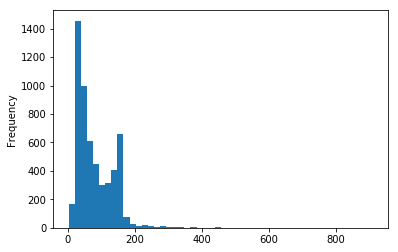

In [78]:
message['length'].plot(bins=50,kind='hist')

In [79]:
message.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [80]:
message[message['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024951B44048>,
      dtype=object)

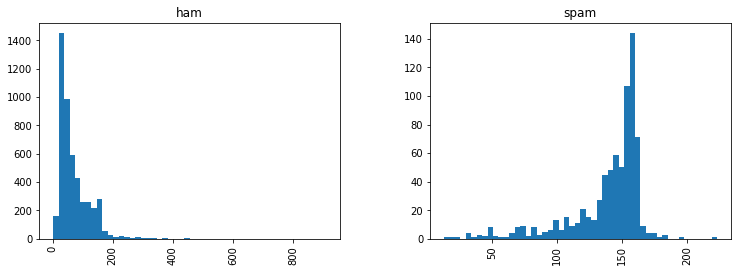

In [81]:
message.hist(column='length',by='label',bins=50,figsize=(12,4))

In [82]:
import string

In [83]:
mess = 'Sample message! Notice: it has punctuation.'

In [84]:
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)

In [85]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [86]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [87]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [88]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [101]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [102]:
message['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(message['message'])

In [110]:
print(len(bow_transformer.vocabulary_))

11425


In [111]:
message4=message['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [112]:
bow4=bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [115]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [116]:
message_bow=bow_transformer.transform(message['message'])

In [117]:
print('shape of sparse matrix:',message_bow.shape)
print('amount of non-zero occurence',message_bow.nnz)

shape of sparse matrix: (5572, 11425)
amount of non-zero occurence 50548


In [120]:
sparsity=(100.0*message_bow.nnz/(message_bow.shape[0] * message_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [124]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer().fit(message_bow)
tfidf4=tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [125]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [129]:
message_tfidf=tfidf_transformer.transform(message_bow)
print(message_tfidf.shape)

(5572, 11425)


In [131]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(message_tfidf,message['label'])

In [135]:
print('predicted',spam_detect_model.predict(tfidf4)[0])
print("expected",message.label[3])

predicted ham
expected ham


In [137]:
all_predictions=spam_detect_model.predict(message_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [139]:
from sklearn.metrics import classification_report
print(classification_report(message['label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



### https://medium.com/@pemagrg/build-a-web-app-using-pythons-flask-for-beginners-f28315256893

### https://medium.com/@adriensieg/text-similarities-da019229c894


###  https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e

In [141]:
import nltk
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import random
import string

f = open('chatbot.txt','r',errors='ignore')
raw = f.read()
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]
remov_pun = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remov_pun)))

GREETING_INPUTS = ("hello", "hi", "greetings","wassup","hey")
GREETING_RESPONSES = ["hi","hey","Hi There","I'm glad that you are talking to me"]

def greetCheck(sentence):
  for word in sentence.split():
    if word.lower() in GREETING_INPUTS:
      return random.choice(GREETING_RESPONSES)
    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def responseText(user_response):
  sent_tokens.append(user_response)
  TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
  tfidf = TfidfVec.fit_transform(sent_tokens)
  vals = cosine_similarity(tfidf[-1],tfidf)
  idx = vals.argsort()[0][-2]
  sent_tokens.remove(user_response)
  if(greetCheck(user_response)!=None):
    response = greetCheck(user_response)
  else:
    response = sent_tokens[idx] 
  return response

print(responseText('alan turing'))




Background
In 1950, Alan Turing's famous article "Computing Machinery and Intelligence" was published, which proposed what is now called the Turing test as a criterion of intelligence.
